In [1]:
import cv2, os
import numpy as np
import scipy.io as io

### Processed images with points

In [2]:
date = 'test_2023_06_29_20_30'
img_dir = './' + date + '_processed/'
img_fns = os.listdir(img_dir)

point_dir = './' + date + '_points/'
point_fns = os.listdir(point_dir)

In [3]:
img = cv2.imread(os.path.join(img_dir, img_fns[0], '450nm.png'))
points = np.array(io.loadmat(os.path.join(point_dir, point_fns[0], '450nm_centroid.mat'))['s'])

In [4]:
points = [points[i][0][0][0] for i in range(len(points))]

In [5]:
points

[array([ 76.9119171 , 466.65284974]),
 array([ 82.8030303 , 336.14646465]),
 array([ 89.        , 209.35393258]),
 array([96.41573034, 87.21348315]),
 array([467.2       , 480.20714286]),
 array([471.54961832, 353.23664122]),
 array([476.97413793, 229.46551724]),
 array([483.67164179, 109.79104478])]

In [6]:
import matplotlib.pyplot as plt


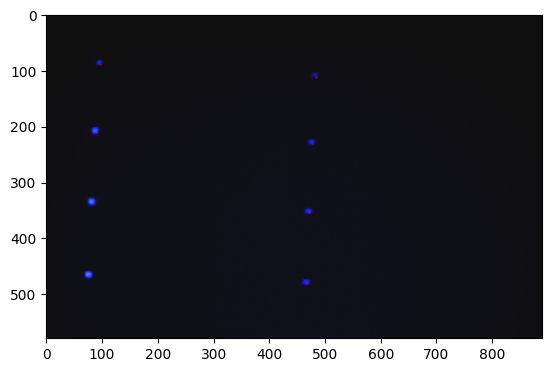

In [7]:
plt.figure()
plt.imshow(img[:,:,::-1])
for i in range(len(points)):
    plt.scatter(points[i][0], points[i][1], c = 'red', s = 0.1)

In [58]:
pts_dir = './test_2023_07_03_17_15_patterns/'
pts_fns = os.listdir(pts_dir)

for i in range(len(pts_fns)):
    patt_npy = np.load(os.path.join(pts_dir, pts_fns[i]))
    np.save(os.path.join(pts_dir, pts_fns[i]), patt_npy[1:])

patt_npy = np.load(os.path.join(pts_dir, pts_fns[1]))
patt_npy

array([[ 90, 245],
       [ 90, 170],
       [ 90,  95],
       [ 90,  20]])

In [54]:
patt_dir = './test_2023_06_29_20_30_patterns'
patt_0 = np.load(os.path.join(patt_dir, os.listdir(patt_dir)[0]))

full_res = np.zeros(shape=(360,640,3))

In [55]:
DOT_SIZE = 5

for i in range(patt_0.shape[0]):
    center_x, center_y = patt_0[i,0], patt_0[i,1]
    x_start = center_x - DOT_SIZE // 2
    y_start = center_y - DOT_SIZE // 2
    x_end = x_start + DOT_SIZE
    y_end = y_start + DOT_SIZE
        
    full_res[y_start : y_end, x_start : x_end] = 1

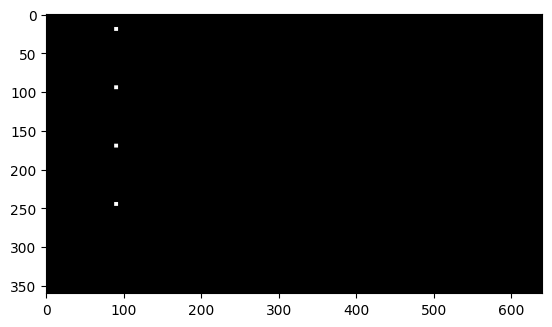

In [56]:
plt.imshow(full_res)

In [57]:
cv2.imwrite('./full_res.png', full_res*255.)

True